In [1]:
pwd

'C:\\Users\\ayush\\Pictures\\GITHUB_UPLOAD\\regression_random_forest_sales_estimation'

In [3]:
import pandas as pd
df1=pd.read_csv('./csv_file/train_amazon.csv') #loading the train set
df2=pd.read_csv('./csv_file/test_amazon.csv')  #loading the test set

In [4]:
df1.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
# Checking Null values in Train Set
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Checking Null values in Test Set
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
#Filling the Null values in 'Item_Weight' column with the average weight
df1['Item_Weight'].fillna(value=df1['Item_Weight'].mean(),inplace=True)
df2['Item_Weight'].fillna(value=df2['Item_Weight'].mean(),inplace=True)

#Filling the Null values in 'Outlet_Size' column with "Unknown"
df1['Outlet_Size'].fillna(value='Unknown',inplace=True)
df2['Outlet_Size'].fillna(value='Unknown',inplace=True)

In [8]:
#Checking the Null values in Train set
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
#Checking the Null values in Test set
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


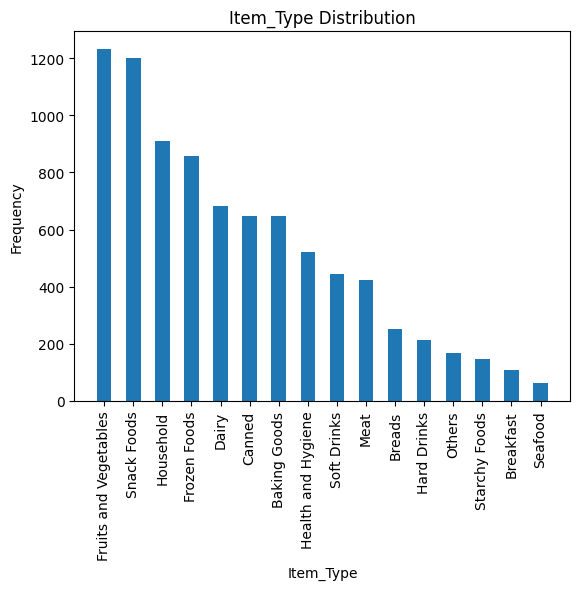

In [10]:
df1['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Type'].value_counts().index, df1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Type Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',df1['Item_Type'].value_counts())

In [11]:
# Let's categorize 'Item_Type' into 'Non consumables', 'Drinks' and 'Foods' according to the 'Item_Identifier'
def item_identify(cols):
  item_id=cols[0]
  item_type=cols[1]

  if item_id[:2] == 'NC':
    return 'Non Consumables'
  elif item_id[:2] == 'DR':
    return 'Drinks'
  else:
    return 'Foods'

In [12]:
df1['Item_Type']=df1[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)
df2['Item_Type']=df2[['Item_Identifier','Item_Type']].apply(item_identify,axis=1)

Item_Type:
 Foods              6125
Non Consumables    1599
Drinks              799
Name: Item_Type, dtype: int64


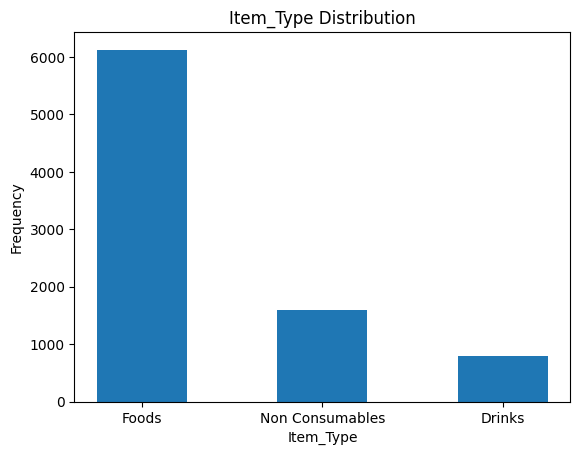

In [13]:
df1['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Type'].value_counts().index, df1['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')
print('Item_Type:\n',df1['Item_Type'].value_counts())

Item_Fat_Content:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


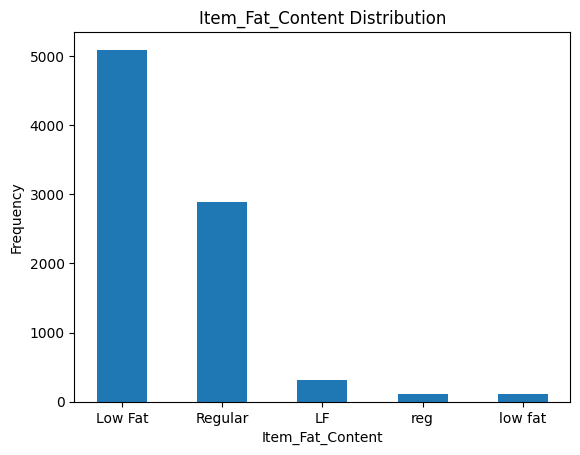

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Fat_Content'].value_counts().index, df1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',df1['Item_Fat_Content'].value_counts())
#df1['Item_Fat_Content'].value_counts()

In [15]:
# From the above graph we can see that there are actually two classes in 'Item_Fat_Content'. But some of the items are non consumables.
def item_fat(cols):
  fat=cols[0]
  typ=cols[1]

  if (fat=='Low Fat' or fat=='LF' or fat=='low fat') and (typ=='Foods' or typ=='Drinks'):
    return 'Low Fat'
  elif (fat=='Regular' or fat=='reg') and (typ=='Foods' or typ=='Drinks'):
    return 'Regular'
  else:
    return 'Non Edible'


In [16]:
df1['Item_Fat_Content']=df1[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)
df2['Item_Fat_Content']=df2[['Item_Fat_Content','Item_Type']].apply(item_fat,axis=1)

Item_Fat_Content:
 Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


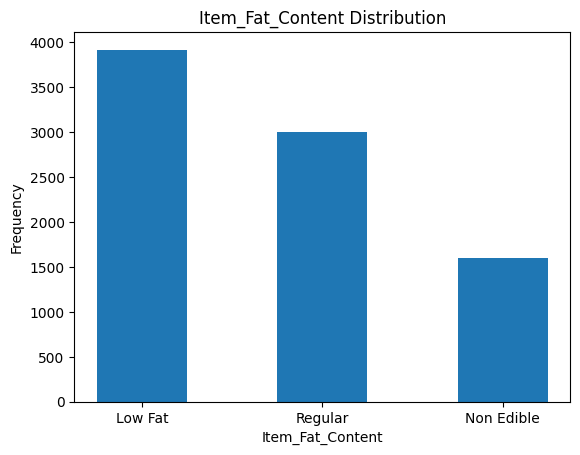

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Item_Fat_Content'].unique(), df1['Item_Fat_Content'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Item_Fat_Content Distribution')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')
print('Item_Fat_Content:\n',df1['Item_Fat_Content'].value_counts())

Text(0, 0.5, 'Frequency')

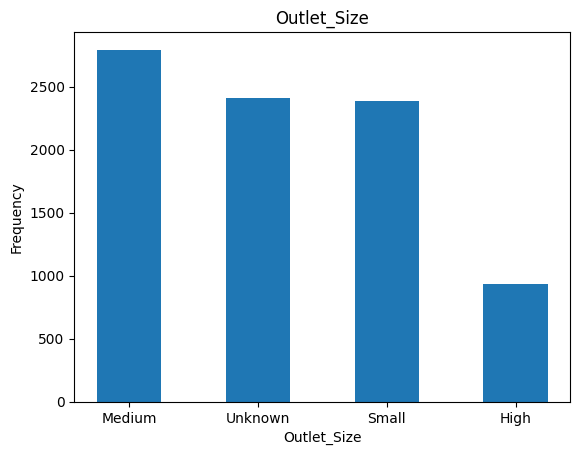

In [18]:
df1['Outlet_Size'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Size'].value_counts().index, df1['Outlet_Size'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Size')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Size')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

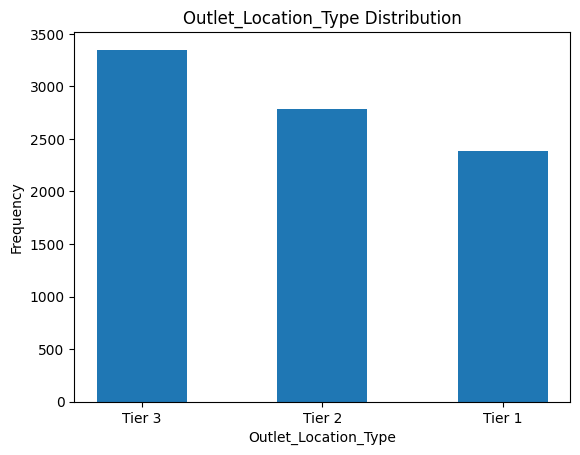

In [19]:
df1['Outlet_Location_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Location_Type'].value_counts().index, df1['Outlet_Location_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Location_Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

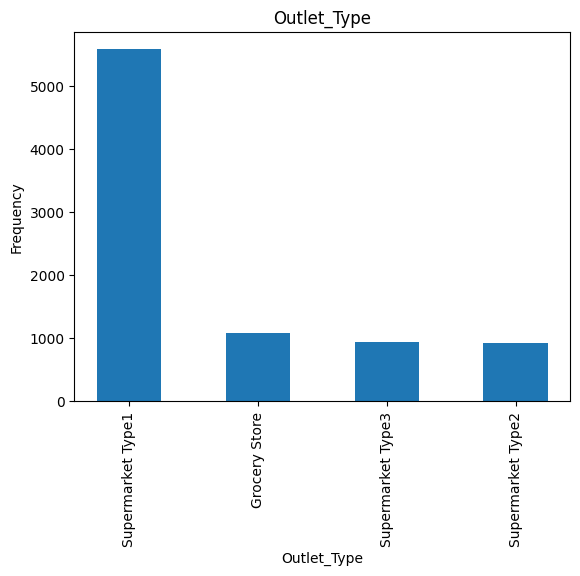

In [20]:
df1['Outlet_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(df1['Outlet_Type'].value_counts().index, df1['Outlet_Type'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Outlet_Type')
plt.xticks(rotation='vertical')
plt.xlabel('Outlet_Type')
plt.ylabel('Frequency')

In [21]:
df1['Item_Visibility'].value_counts().head(3)

0.000000    526
0.076975      3
0.162462      2
Name: Item_Visibility, dtype: int64

In [22]:
#The column 'Item_Visibility' has lots of 0 values. Let's fill this values with the mean value
df1['Item_Visibility'].mask(df1['Item_Visibility']== 0,df1['Item_Visibility'].mean(),inplace=True)
df2['Item_Visibility'].mask(df2['Item_Visibility']== 0,df2['Item_Visibility'].mean(),inplace=True)

In [23]:
#Let's add a new feature that would have the number of years the outlet has been in operation till 2013. (This dataset is from 2013).
def num_years(col):
  return 2013-col

In [24]:
df1['Years_of_Operation']=df1['Outlet_Establishment_Year'].apply(num_years)
df2['Years_of_Operation']=df2['Outlet_Establishment_Year'].apply(num_years)

In [25]:
# One hot encoding the categorical variables in both train and test set
item_fat_content=pd.get_dummies(df1['Item_Fat_Content'])
item_type=pd.get_dummies(df1['Item_Type'])
outlet_size=pd.get_dummies(df1['Outlet_Size'])
outlet_location_type=pd.get_dummies(df1['Outlet_Location_Type'])
output_type=pd.get_dummies(df1['Outlet_Type'])

item_fat_content_test=pd.get_dummies(df2['Item_Fat_Content'])
item_type_test=pd.get_dummies(df2['Item_Type'])
outlet_size_test=pd.get_dummies(df2['Outlet_Size'])
outlet_location_type_test=pd.get_dummies(df2['Outlet_Location_Type'])
output_type_test=pd.get_dummies(df2['Outlet_Type'])

In [26]:
train=df1
train=pd.concat([train,item_fat_content,item_type,outlet_size,outlet_location_type,output_type],axis=1)
train.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)
test=df2
test=pd.concat([test,item_fat_content_test,item_type_test,outlet_size_test,outlet_location_type_test,output_type_test],axis=1)
test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],axis=1,inplace=True)

In [27]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']
x_test=test

In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

x_test=sc_x.fit_transform(x_test)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=42)

## **Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
predictions=lm.predict(x_val)

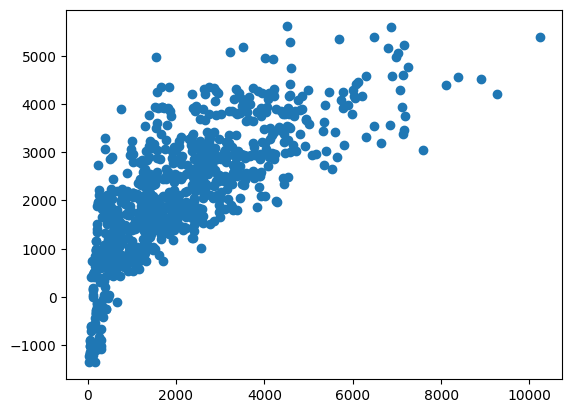

In [32]:
plt.scatter(y_val,predictions)

<ipython-input-35-335f9afb9e99>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_val-predictions))


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

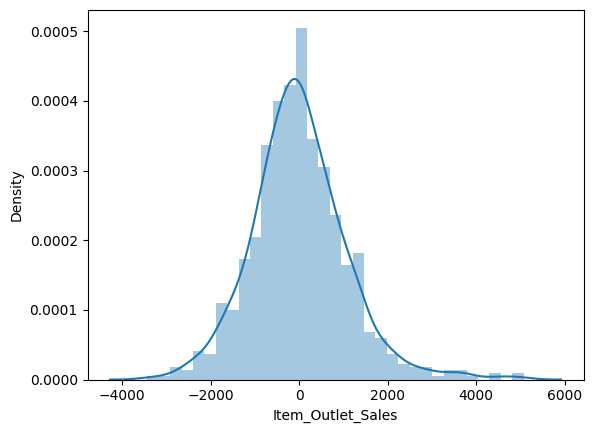

In [35]:
import seaborn as sns
sns.distplot((y_val-predictions))

In [36]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions))

Mean Absolute Error:  805.0602458549192
Mean Squared Error:  1179338.5622745825
Root Mean Squared Error:  1085.9735550530604
Explained Variance Score:  0.578208495009436


## **Random Forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=76,n_jobs=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=76, n_estimators=400,
                      n_jobs=4)

In [38]:
predictions1=rf.predict(x_val)

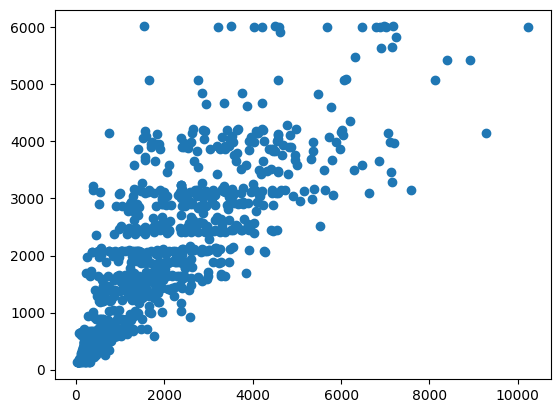

In [39]:
plt.scatter(y_val,predictions1)

<ipython-input-40-bd84395c3696>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_val-predictions1))


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

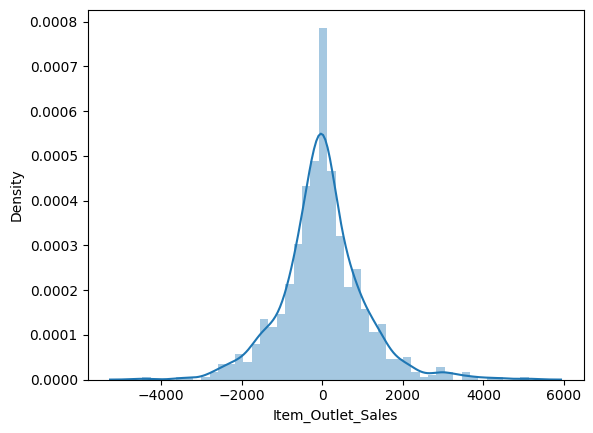

In [40]:
import seaborn as sns
sns.distplot((y_val-predictions1))

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_val,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_val,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_val,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_val,predictions1))

Mean Absolute Error:  721.9482692470027
Mean Squared Error:  1060359.6575380685
Root Mean Squared Error:  1029.7376644262695
Explained Variance Score:  0.6207417638502686


In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    #'bootstrap': [True],
    #'max_depth': range(1,15,1),
    #'min_samples_leaf': range(70,80,1),
    #'min_samples_split': [8, 10, 12],
    'n_estimators': range(100,500,100)
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(x, y)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.4min finished


({'n_estimators': 400}, -797.8347339432124)